c:\Users\Track Computers\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000022033F78860> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


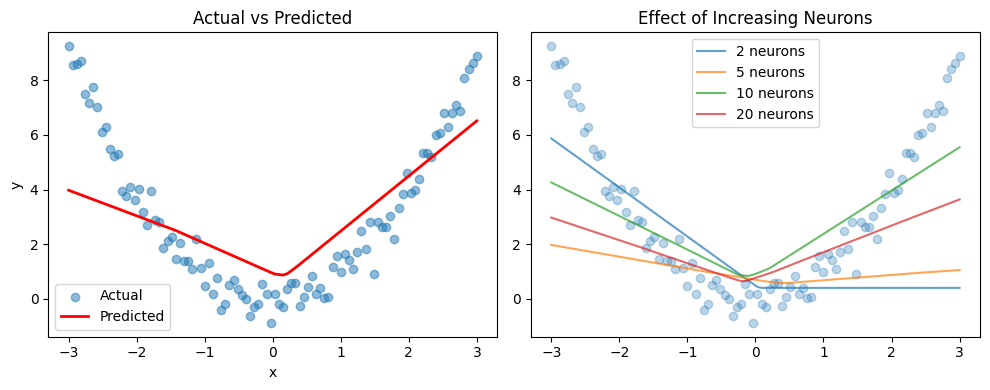

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# Generate data
np.random.seed(42)
x = np.linspace(-3, 3, 100).reshape(-1, 1)
y = x**2 + np.random.normal(0, 0.5, (100, 1))
# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])
# Compile and train
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=100, verbose=0)
# Predict
y_pred = model.predict(x)
# Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(x, y, label='Actual', alpha=0.5)
plt.plot(x, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs Predicted')
plt.legend()
# Test with different neuron counts
plt.subplot(1, 2, 2)
neuron_counts = [2, 5, 10, 20]
for neurons in neuron_counts:
    temp_model = tf.keras.Sequential([
        tf.keras.layers.Dense(neurons, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(neurons, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    temp_model.compile(optimizer='adam', loss='mse')
    temp_model.fit(x, y, epochs=50, verbose=0)
    temp_pred = temp_model.predict(x)
    plt.plot(x, temp_pred, label=f'{neurons} neurons', alpha=0.7)
plt.scatter(x, y, alpha=0.3)
plt.legend()
plt.title('Effect of Increasing Neurons')
plt.tight_layout()
plt.show()